# Lecture 9.1: Factor
<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will understand:**
* Learn how to deal with categorical variable 
</div>

This correpsonds to Chapter 15 of your book



    




In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Factors
Recall that a random variable is *categorical* if it takes on one of a (small) number of discrete values. 

In [2]:
birth_months <- c("Jan", "Feb", "Sep", "Ser", "Dec", "Jan", "Jul", "Aug")  # categorical variable
birth_months

[1] "Jan" "Feb" "Sep" "Ser" "Dec" "Jan" "Jul" "Aug"

Using a string to record this variable has some problems.  First of all there are only twelve possible months, there is nothing prevent you from typos:

In [3]:
sort(birth_months)

[1] "Aug" "Dec" "Feb" "Jan" "Jan" "Jul" "Sep" "Ser"

It does not sort in a useful way.

You can fix the above problems by setting the categorical variable into a factor.

The *possible* values of a categorical variable are called the *levels*. The levels of `birth_months` should be `Jan`, `Feb`, ..., `Dec`. The *actual* values of `birth_months` are just called the values.

*Factors* are the traditional way to represent categorical data in R. To create a factor, we must specify the levels and the values:

In [4]:
month.abb # This basically print out all of the possible value of months

[1] "Jan" "Feb" "Mar" "Apr" "May" "Jun" "Jul" "Aug" "Sep" "Oct" "Nov" "Dec"

To create a factor, you can use the `factor` function

In [5]:
print(birth_months)
factor(birth_months)
str(factor(birth_months))
#str(factor(birth_months, levels=month.abb))

[1] "Jan" "Feb" "Sep" "Ser" "Dec" "Jan" "Jul" "Aug"


[1] Jan Feb Sep Ser Dec Jan Jul Aug
Levels: Aug Dec Feb Jan Jul Sep Ser

 Factor w/ 7 levels "Aug","Dec","Feb",..: 4 3 6 7 2 4 5 1


If you specify the factor levels using the `levels=` option, then that will specify the default order. If you do *not* specify the levels, then they will be sorted alphabetically by default:

In [6]:
sort(birth_months)

[1] "Aug" "Dec" "Feb" "Jan" "Jan" "Jul" "Sep" "Ser"

It's best to be explicit about the factor levels. This way, if you there are typos or data entry errors, you will catch them more easily:

In [7]:
factor(birth_months,levels=month.abb)

birth_months_fac <- factor(birth_months,levels=month.abb)
sort(birth_months_fac)


[1] Jan  Feb  Sep  <NA> Dec  Jan  Jul  Aug 
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

[1] Jan Jan Feb Jul Aug Sep Dec
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

### The `forcats` package
`tidyverse` contains a package that has some tools for working with factors. Sometimes it is not automatically loaded by the `tidyverse` metapackage, in which case you must load it manually:

In [8]:
library(forcats)

`forcats` commands are prefixed by `fct_` (compare `stringr`).

For the rest of the examples, we'll use a data set included in `forcats` called `gss_cat`. This is a standard data set from the General Social Survey which contains a lot of categorical variables:

In [9]:
print(forcats::gss_cat)

# A tibble: 21,483 × 9
    year marital         age race  rincome        partyid  relig  denom  tvhours
   <int> <fct>         <int> <fct> <fct>          <fct>    <fct>  <fct>    <int>
 1  2000 Never married    26 White $8000 to 9999  Ind,nea… Prote… South…      12
 2  2000 Divorced         48 White $8000 to 9999  Not str… Prote… Bapti…      NA
 3  2000 Widowed          67 White Not applicable Indepen… Prote… No de…       2
 4  2000 Never married    39 White Not applicable Ind,nea… Ortho… Not a…       4
 5  2000 Divorced         25 White Not applicable Not str… None   Not a…       1
 6  2000 Married          25 White $20000 - 24999 Strong … Prote… South…      NA
 7  2000 Never married    36 White $25000 or more Not str… Chris… Not a…       3
 8  2000 Divorced         44 White $7000 to 7999  Ind,nea… Prote… Luthe…      NA
 9  2000 Married          44 White $25000 or more Not str… Prote… Other        0
10  2000 Married          47 White $25000 or more Strong … Prote… South…       3
# … w

### Order
One advantage of factors is that they can be ordered. This enables them to sort and plot in the way you would expect. Compare:

In [10]:
sort(birth_months)
sort(birth_months_fac)

# You have already seen the sort function above

[1] "Aug" "Dec" "Feb" "Jan" "Jan" "Jul" "Sep" "Ser"

[1] Jan Jan Feb Jul Aug Sep Dec
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

If you specify the factor levels using the `levels=` option, then that will specify the default order. If you do *not* specify the levels, then they will be sorted alphabetically by default:

In [11]:
levels(birth_months_fac)
levels(factor(birth_months))

[1] "Jan" "Feb" "Mar" "Apr" "May" "Jun" "Jul" "Aug" "Sep" "Oct" "Nov" "Dec"

[1] "Aug" "Dec" "Feb" "Jan" "Jul" "Sep" "Ser"

There are several options for reordering factor levels. The first is `fct_reorder` which we have already seen. It reorders a factor based on the values of another continuous variable.

Suppose that we are interested in a plot of whether religion is associated with tvhours.

In [12]:
relig_summary = gss_cat %>%
  group_by(relig) %>%
  summarise(
    age = mean(age, na.rm = TRUE),
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
  ) %>% print 

# A tibble: 15 × 4
   relig                     age tvhours     n
   <fct>                   <dbl>   <dbl> <int>
 1 No answer                49.5    2.72    93
 2 Don't know               35.9    4.62    15
 3 Inter-nondenominational  40.0    2.87   109
 4 Native american          38.9    3.46    23
 5 Christian                40.1    2.79   689
 6 Orthodox-christian       50.4    2.42    95
 7 Moslem/islam             37.6    2.44   104
 8 Other eastern            45.9    1.67    32
 9 Hinduism                 37.7    1.89    71
10 Buddhism                 44.7    2.38   147
11 Other                    41.0    2.73   224
12 None                     41.2    2.71  3523
13 Jewish                   52.4    2.52   388
14 Catholic                 46.9    2.96  5124
15 Protestant               49.9    3.15 10846


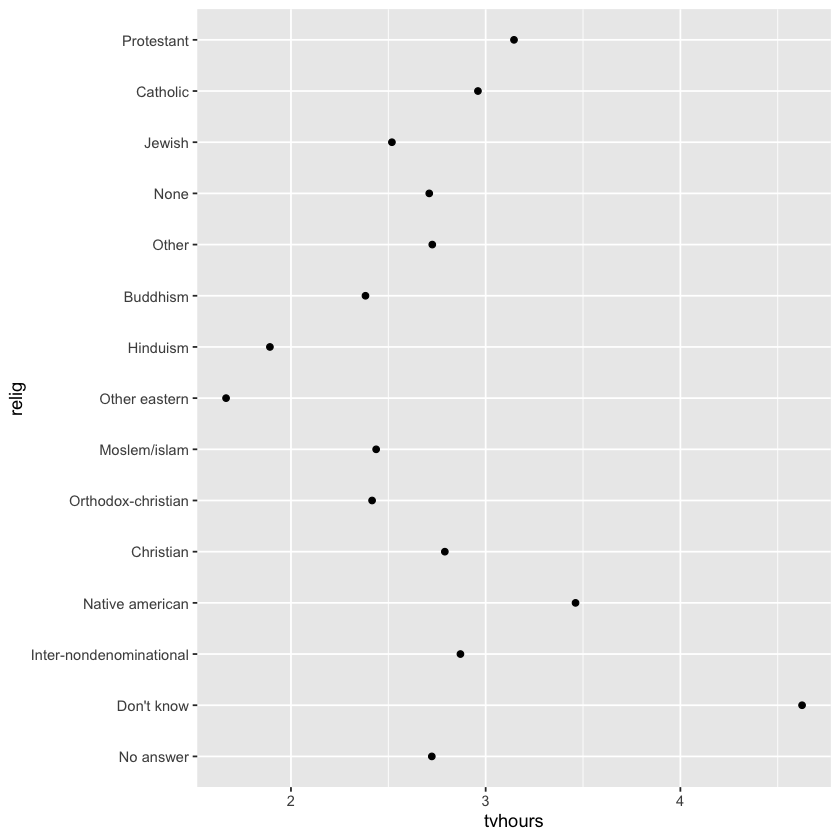

In [13]:
ggplot(relig_summary) + geom_point(aes(tvhours, relig))

The above plot is very difficult to interpret because there is no overall pattern.  We can improve it by reordering the levels of religion using the `fct_reorder` function.  It takes two arguments -- factor you want to modify, a numeric vector that you want to use to reorder the levels.

[1] No answer               Don't know              Inter-nondenominational
[4] Native american         Christian               Orthodox-christian     
16 Levels: No answer Don't know Inter-nondenominational ... Not applicable

[1] No answer               Don't know              Inter-nondenominational
[4] Native american         Christian               Orthodox-christian     
16 Levels: Other eastern Hinduism Buddhism Orthodox-christian ... Not applicable

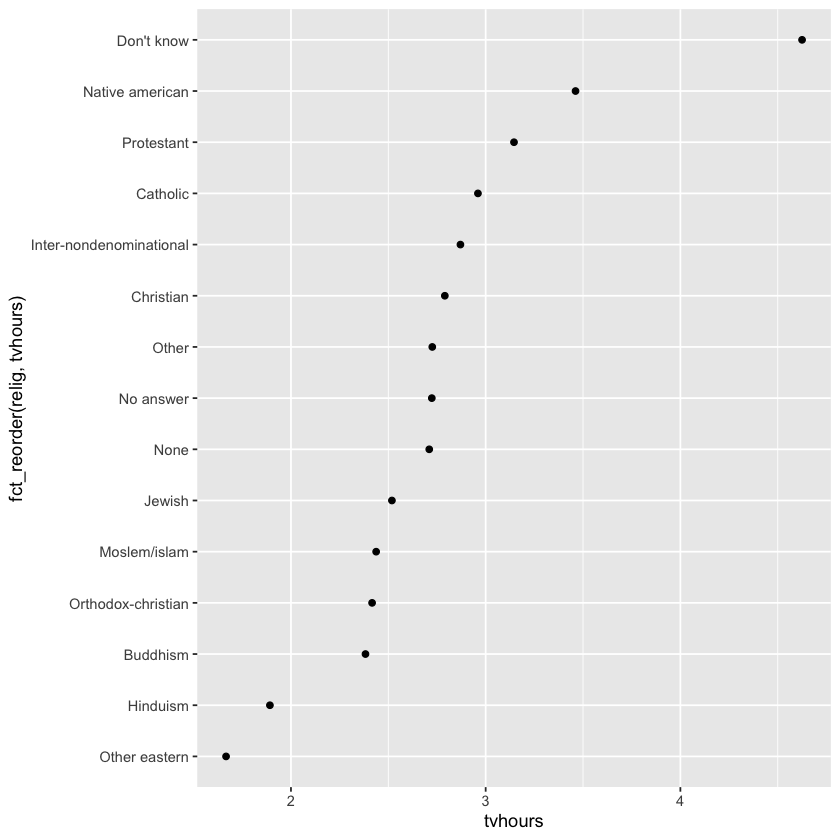

In [14]:
head(relig_summary$relig)
head(fct_reorder(relig_summary$relig, relig_summary$tvhours))
ggplot(relig_summary) + geom_point(aes(tvhours, fct_reorder(relig, tvhours)))

What if we want to create a plot to investigate how age varies across reported income level?

In [15]:
rincome_summary = gss_cat %>%
  group_by(rincome) %>%
  summarise(
    age = mean(age, na.rm = TRUE),
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
  ) %>% print

# A tibble: 16 × 4
   rincome          age tvhours     n
   <fct>          <dbl>   <dbl> <int>
 1 No answer       45.5    2.90   183
 2 Don't know      45.6    3.41   267
 3 Refused         47.6    2.48   975
 4 $25000 or more  44.2    2.23  7363
 5 $20000 - 24999  41.5    2.78  1283
 6 $15000 - 19999  40.0    2.91  1048
 7 $10000 - 14999  41.1    3.02  1168
 8 $8000 to 9999   41.1    3.15   340
 9 $7000 to 7999   38.2    2.65   188
10 $6000 to 6999   40.3    3.17   215
11 $5000 to 5999   37.8    3.16   227
12 $4000 to 4999   38.9    3.15   226
13 $3000 to 3999   37.8    3.31   276
14 $1000 to 2999   34.5    3.00   395
15 Lt $1000        40.5    3.36   286
16 Not applicable  56.1    3.79  7043


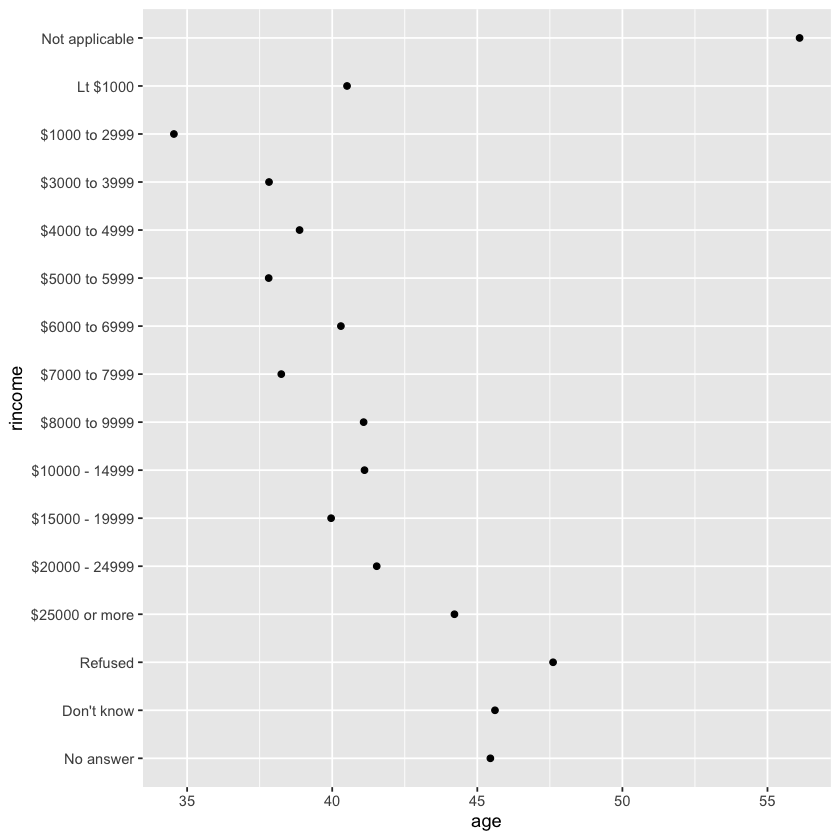

In [16]:
ggplot(rincome_summary) + geom_point(aes(age, rincome))

The plot may look visually appealing but the $y$-axis is totally jumbled! This shows that we only use `fct_reorder` in cases where there is not already a natural order. 

Nevertheless, there are a few categories that can be sensibly broken out: `No answer`, `Not applicable`, `Don't Know` and `Refused`. The command `fct_relevel(f, lvls)` takes a factor `f` and returns a new factor which has the vector `lvls` of factor levels placed at the front:

In [17]:
rincome_summary$rincome
fct_relevel(rincome_summary$rincome, 'Not applicable')

[1] No answer      Don't know     Refused        $25000 or more $20000 - 24999
 [6] $15000 - 19999 $10000 - 14999 $8000 to 9999  $7000 to 7999  $6000 to 6999 
[11] $5000 to 5999  $4000 to 4999  $3000 to 3999  $1000 to 2999  Lt $1000      
[16] Not applicable
16 Levels: No answer Don't know Refused $25000 or more ... Not applicable

[1] No answer      Don't know     Refused        $25000 or more $20000 - 24999
 [6] $15000 - 19999 $10000 - 14999 $8000 to 9999  $7000 to 7999  $6000 to 6999 
[11] $5000 to 5999  $4000 to 4999  $3000 to 3999  $1000 to 2999  Lt $1000      
[16] Not applicable
16 Levels: Not applicable No answer Don't know Refused ... Lt $1000

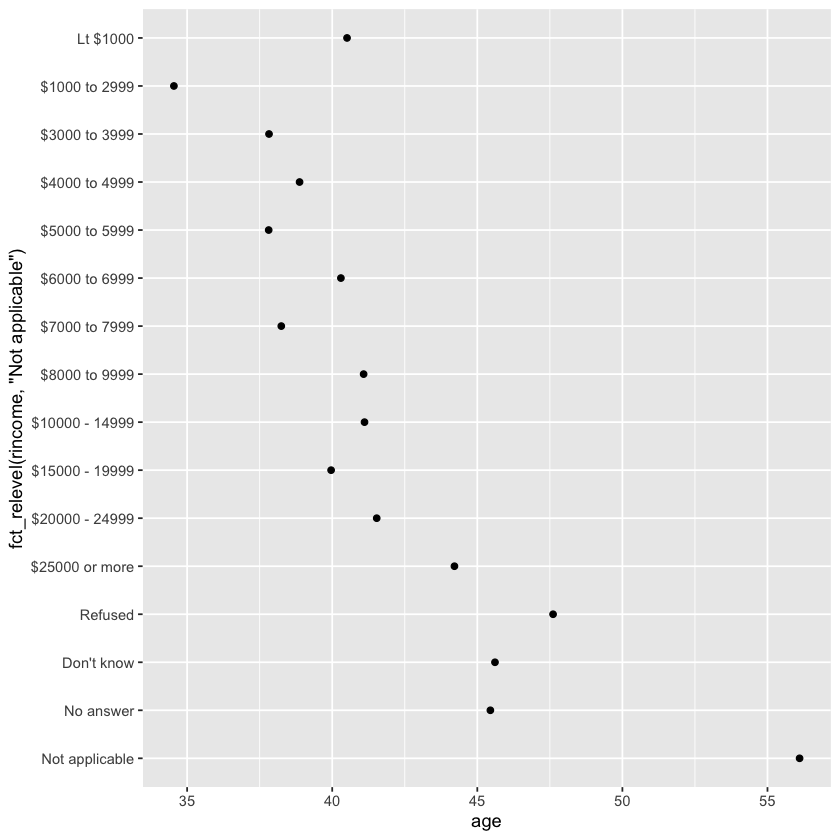

In [18]:
ggplot(rincome_summary) + geom_point(aes(age, fct_relevel(rincome, 'Not applicable')))

Finally we have a couple of other useful commands. `fct_infreq(f)` will reorder the levels in `f` increasing frequency. This is useful with `geom_bar`:

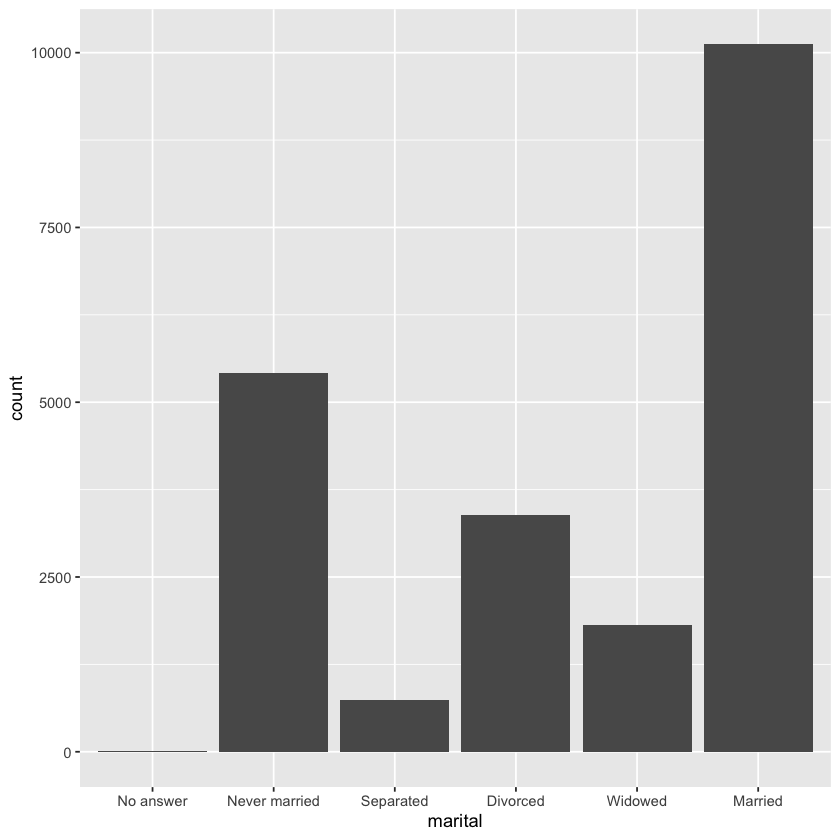

In [19]:
ggplot(gss_cat, aes(marital)) + geom_bar()

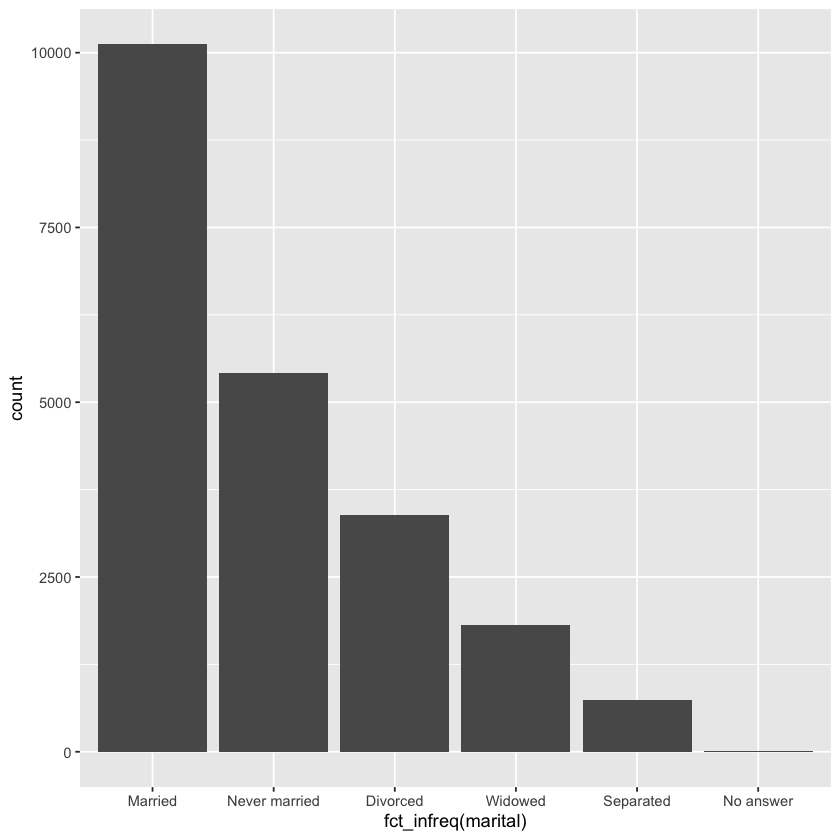

In [20]:
ggplot(gss_cat, aes(fct_infreq(marital))) + geom_bar()

`fct_rev` will reverse the order of a factor:

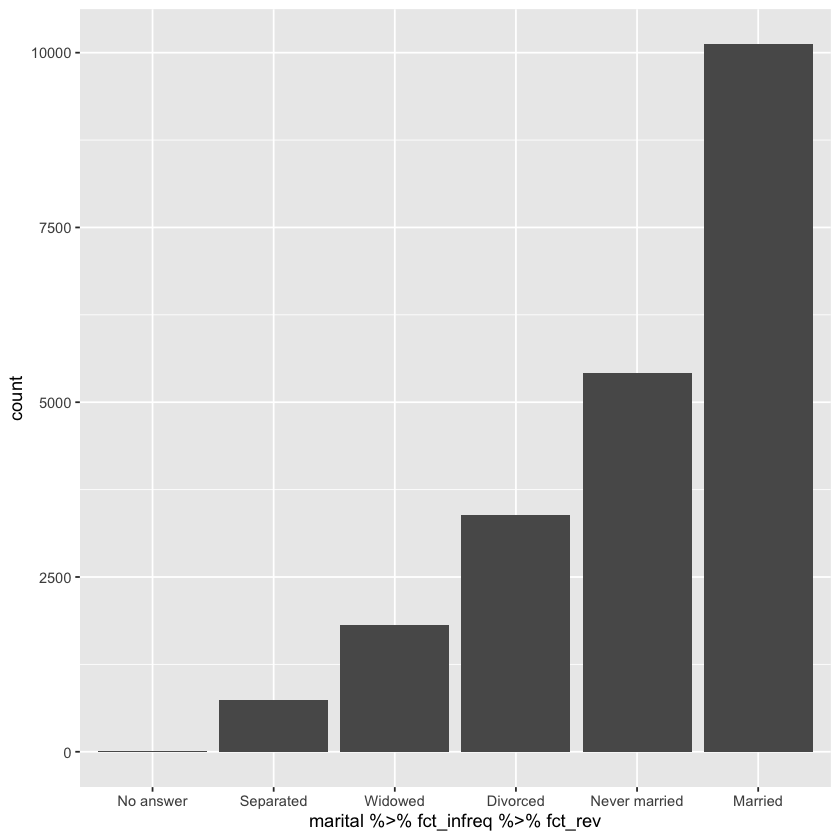

In [21]:
ggplot(gss_cat, aes(marital %>% fct_infreq %>% fct_rev)) + geom_bar()

### Altering levels
In many cases it is necessary to change the *values* of a factor, especially when generating plots and tables for publications. 

In [22]:
count(gss_cat, partyid)

partyid,n
<fct>,<int>
No answer,154
Don't know,1
Other party,393
Strong republican,2314
Not str republican,3032
"Ind,near rep",1791
Independent,4119
"Ind,near dem",2499
Not str democrat,3690


The `fct_recode` command makes this easy. This command takes a factor and a set of `new_level=old_level` options:

In [23]:
gss_cat %>%
  mutate(partyid = fct_recode(partyid,
    "Republican, strong"    = "Strong republican",
    "Republican, weak"      = "Not str republican",
    "Independent, near republican" = "Ind,near rep",
    "Independent, near democrat" = "Ind,near dem",
    "Democrat, weak"        = "Not str democrat",
    "Democrat, strong"      = "Strong democrat"
  )) %>%
  mutate(partyid_int = as.integer(partyid)) %>% select(partyid, partyid_int) %>% print
  # count(partyid)

# A tibble: 21,483 × 2
   partyid                      partyid_int
   <fct>                              <int>
 1 Independent, near republican           6
 2 Republican, weak                       5
 3 Independent                            7
 4 Independent, near republican           6
 5 Democrat, weak                         9
 6 Democrat, strong                      10
 7 Republican, weak                       5
 8 Independent, near democrat             8
 9 Democrat, weak                         9
10 Republican, strong                     4
# … with 21,473 more rows


A useful feature of `fct_recode` is for combining multiple factors into one:

In [24]:
gss_cat %>%
  mutate(partyid = fct_recode(partyid,
    "Republican"            = "Strong republican",
    "Republican"            = "Not str republican",
    "Independent"           = "Ind,near rep",
    "Independent"           = "Ind,near dem",
    "Democrat"              = "Not str democrat",
    "Democrat"              = "Strong democrat",
    "Other"                 = "No answer",
    "Other"                 = "Don't know",
    "Other"                 = "Other party"
  )) %>%
  count(partyid)

partyid,n
<fct>,<int>
Other,548
Republican,5346
Independent,8409
Democrat,7180


If there are many levels this gets repetitious, so we have an additional command called `fct_collapse` which is specifically designed to handle this case:

In [25]:
gss_cat %>%
  mutate(partyid = fct_collapse(partyid,
    Other = c("No answer", "Don't know", "Other party"),
    Republican = c("Strong republican", "Not str republican"),
    Independent = c("Ind,near rep", "Independent", "Ind,near dem"),
    Democrat = c("Not str democrat", "Strong democrat")
  )) %>%
  count(partyid)

partyid,n
<fct>,<int>
Other,548
Republican,5346
Independent,8409
Democrat,7180
